In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [83]:

#preparation of data from gov.hk
df = pd.read_json('https://raw.githubusercontent.com/geohk/Coursera_Capstone/master/page-data.json')
new_df = df['result']['data']['allWarsCaseLocation']['edges']
df2 = json_normalize(new_df)
#drop those unrelated columns
df_after_dropping = df2.drop(df2.columns[[1,2,3,4,5,6,10,11,12,13,14,17,18]],axis=1)

#droping those have no distrist
df_after_dropping.replace('-', np.nan, inplace=True)
df_after_dropping.dropna(inplace=True)

#rename columns to a meaningful name
df_after_dropping.columns= ['types','lat','lng','location', 'date','district']


#remove spacing
df_after_dropping['lat'].replace({' ',''} ,inplace =True)
df_after_dropping['lng'].replace({' ',''},inplace =True)
df_after_dropping = df_after_dropping[df_after_dropping.lat != '']


#cast gsp as float otherwise cannot import in folium map
df_after_dropping['lat'] = df_after_dropping['lat'].astype(float)
df_after_dropping['lng'] = df_after_dropping['lng'].astype(float)


df_after_dropping





,types,lat,lng,location,date,district
0,Home Confinees,22.280980,114.130239,"Block E, Minor Staff Quarters, The University ...",2020-02-12,Kennedy Town
1,Home Confinees,22.327606,114.163024,"Chiu Nan Building, 212 Tai Nan Street",2020-02-12,Sham Shui Po
2,Home Confinees,22.333568,114.203167,"Sheung Ching House, Kai Ching Estate",2020-02-12,Kai Tak
3,Home Confinees,22.291778,113.943094,"Block 5, Seaview Crescent",2020-02-12,Tung Chung
4,Home Confinees,22.371106,114.114993,"Tin Po Building, 74 Hau Tei Square",2020-02-11,Tsuen Wan
5,Home Confinees,22.392700,114.193700,"Block H, Sui Wo Court",2020-02-08,Fo Tan
6,Home Confinees,22.435700,114.031000,"Block 3, Sereno Verde",2020-02-06,Yuen Long
7,Home Confinees,22.284400,114.136200,"Hai Kwang Mansion, 71-77 Hill Road",2020-02-06,Sai Ying Pun
8,Stay,22.298400,114.238700,"Yun Mei House, Yau Mei Court",Invalid date,Yau Tong
9,Home Confinees,22.361800,114.105879,"Block 1, Villa Esplanada",2020-02-05,Tsing Yi


In [84]:
#getting GPS from hong kong
address = 'Hong Kong'
geolocator = Nominatim(user_agent="HK")
location = geolocator.geocode(address)
latitude_hk = location.latitude
longitude_hk = location.longitude
print('The geograpical coordinate of HK are {}, {}.'.format(latitude_hk, longitude_hk))

The geograpical coordinate of HK are 22.2793278, 114.1628131.


In [85]:
#port all confirumed and unconfirm 
hk_map = folium.Map(tiles='Stamen Toner',location=[latitude_hk, longitude_hk], zoom_start=14)

# add markers to map
for lat, lng, district, types in zip(df_after_dropping['lat'], df_after_dropping['lng'], df_after_dropping['district'], df_after_dropping['types']):
    label = '{}, & {}'.format(district, types)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hk_map)  
    
hk_map

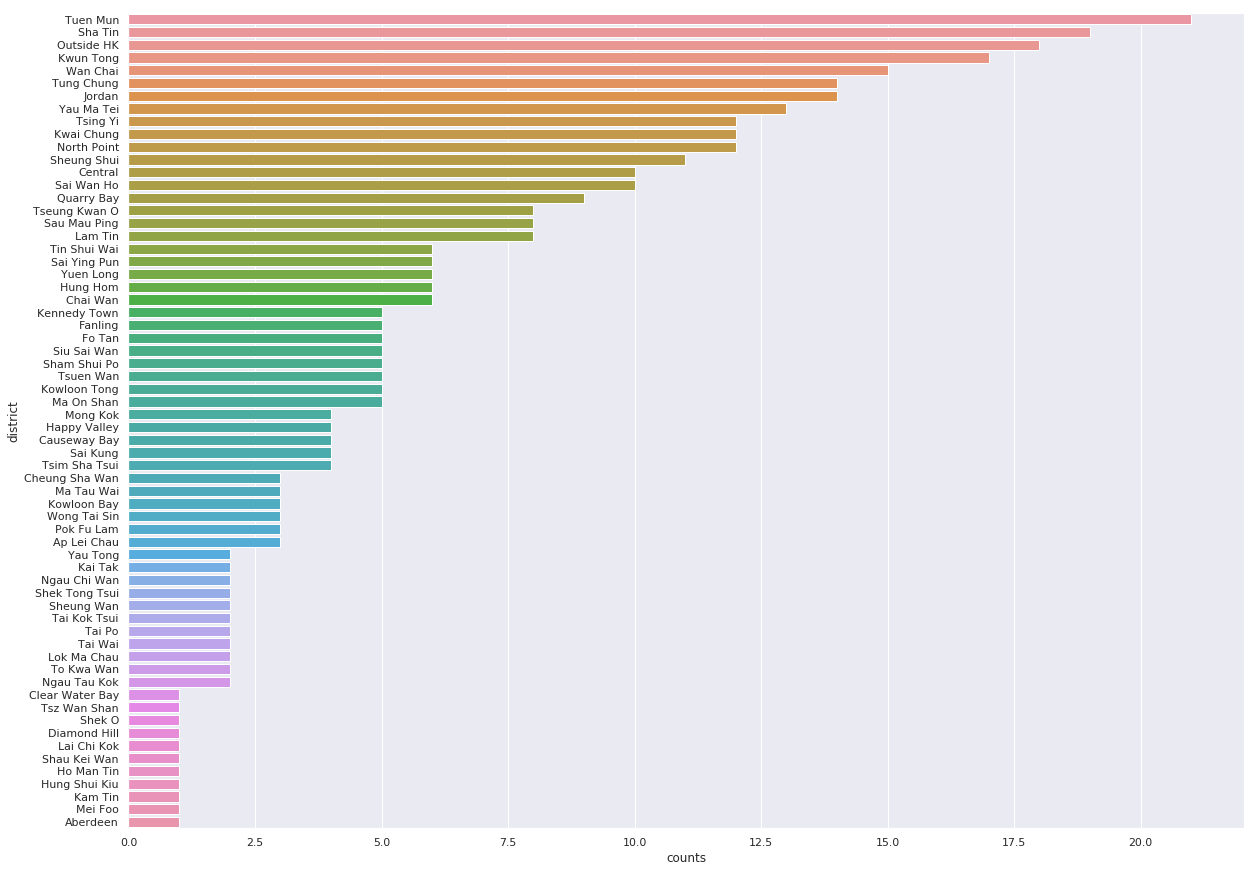

In [88]:
import seaborn as sns
sns.set(style="whitegrid")
df_groupby_dsitrict  = df_after_dropping.groupby(['district']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
df_groupby_dsitrict
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.barplot(x="counts", y="district" ,data=df_groupby_dsitrict ,order=df_groupby_dsitrict['district'])

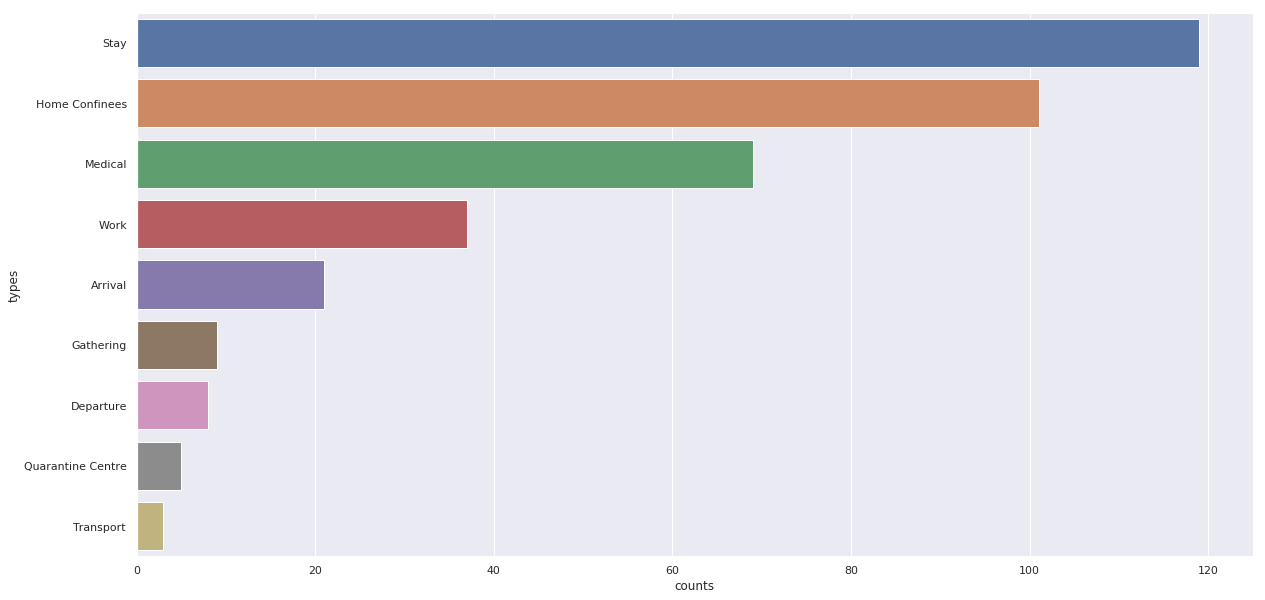

In [89]:
sns.set(rc={'figure.figsize':(20,10)})

df_groupby_type  = df_after_dropping.groupby(['types']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
df_groupby_type
ax = sns.barplot(x="counts", y="types" ,data=df_groupby_type ,order=df_groupby_type['types'])


Cluster Neighborhoods

In [90]:
# one hot encoding
df_onehot = pd.get_dummies(df_after_dropping[['types']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['district'] = df_after_dropping['district'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot
#df_onehot.shape

,district,Arrival,Departure,Gathering,Home Confinees,Medical,Quarantine Centre,Stay,Transport,Work
0,Kennedy Town,0,0,0,1,0,0,0,0,0
1,Sham Shui Po,0,0,0,1,0,0,0,0,0
2,Kai Tak,0,0,0,1,0,0,0,0,0
3,Tung Chung,0,0,0,1,0,0,0,0,0
4,Tsuen Wan,0,0,0,1,0,0,0,0,0
5,Fo Tan,0,0,0,1,0,0,0,0,0
6,Yuen Long,0,0,0,1,0,0,0,0,0
7,Sai Ying Pun,0,0,0,1,0,0,0,0,0
8,Yau Tong,0,0,0,0,0,0,1,0,0
9,Tsing Yi,0,0,0,1,0,0,0,0,0


In [91]:
df_grouped = df_onehot.groupby('district').mean().reset_index()
df_grouped

,district,Arrival,Departure,Gathering,Home Confinees,Medical,Quarantine Centre,Stay,Transport,Work
0,Aberdeen,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
1,Ap Lei Chau,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.333333,0.000000,0.000000
2,Causeway Bay,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.500000
3,Central,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,0.400000,0.000000,0.400000
4,Chai Wan,0.000000,0.000000,0.000000,0.166667,0.666667,0.0,0.166667,0.000000,0.000000
5,Cheung Sha Wan,0.000000,0.000000,0.000000,0.333333,0.666667,0.0,0.000000,0.000000,0.000000
6,Clear Water Bay,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,Diamond Hill,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,Fanling,0.000000,0.000000,0.000000,0.400000,0.400000,0.0,0.200000,0.000000,0.000000
9,Fo Tan,0.000000,0.000000,0.000000,0.400000,0.000000,0.2,0.200000,0.000000,0.200000


In [92]:
from sklearn.cluster import KMeans
kclusters = 5

covid_grouped_clustering = df_grouped.drop('district', 1)
covid_grouped_clustering
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(covid_grouped_clustering)

#check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 3, 2, 0, 1, 1, 3, 3, 1, 4, 0, 0, 3, 3, 4, 4, 3, 3, 2, 1, 4, 0,
       2, 4, 4, 0, 2, 4, 2, 4, 1, 2, 0, 1, 0, 4, 0, 4, 1, 1, 3, 2, 0, 3,
       4, 0, 0, 3, 1, 3, 3, 0, 4, 0, 0, 3, 0, 1, 4, 0, 3, 0, 0, 3],
      dtype=int32)

In [93]:
def return_most_type(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:

num_top = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['district']
for ind in np.arange(num_top):
    columns.append('{}{} '.format(ind+1, indicators[ind]))
   

# create a new dataframe
covid_df_sorted = pd.DataFrame(columns=columns)
covid_df_sorted['district'] = df_grouped['district']

for ind in np.arange(df_grouped.shape[0]):
    covid_df_sorted.iloc[ind, 1:] = return_most_type(df_grouped.iloc[ind, :], num_top)

covid_df_sorted

,district,1st,2nd,3rd
0,Aberdeen,Stay,Work,Transport
1,Ap Lei Chau,Home Confinees,Stay,Work
2,Causeway Bay,Work,Medical,Transport
3,Central,Work,Stay,Medical
4,Chai Wan,Medical,Stay,Home Confinees
5,Cheung Sha Wan,Medical,Home Confinees,Work
6,Clear Water Bay,Home Confinees,Work,Transport
7,Diamond Hill,Home Confinees,Work,Transport
8,Fanling,Medical,Home Confinees,Stay
9,Fo Tan,Home Confinees,Work,Stay


In [98]:
# add clustering labels
#covid_df_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

covid_df_merged = df_after_dropping
covid_df_final = covid_df_merged.join(covid_df_sorted.set_index('district'), on='district')

covid_df_final

,types,lat,lng,location,date,district,Cluster Labels,1st,2nd,3rd
0,Home Confinees,22.280980,114.130239,"Block E, Minor Staff Quarters, The University ...",2020-02-12,Kennedy Town,3,Home Confinees,Work,Transport
1,Home Confinees,22.327606,114.163024,"Chiu Nan Building, 212 Tai Nan Street",2020-02-12,Sham Shui Po,3,Home Confinees,Medical,Work
2,Home Confinees,22.333568,114.203167,"Sheung Ching House, Kai Ching Estate",2020-02-12,Kai Tak,4,Home Confinees,Arrival,Work
3,Home Confinees,22.291778,113.943094,"Block 5, Seaview Crescent",2020-02-12,Tung Chung,4,Arrival,Departure,Home Confinees
4,Home Confinees,22.371106,114.114993,"Tin Po Building, 74 Hau Tei Square",2020-02-11,Tsuen Wan,3,Home Confinees,Quarantine Centre,Work
5,Home Confinees,22.392700,114.193700,"Block H, Sui Wo Court",2020-02-08,Fo Tan,4,Home Confinees,Work,Stay
6,Home Confinees,22.435700,114.031000,"Block 3, Sereno Verde",2020-02-06,Yuen Long,3,Home Confinees,Stay,Work
7,Home Confinees,22.284400,114.136200,"Hai Kwang Mansion, 71-77 Hill Road",2020-02-06,Sai Ying Pun,4,Home Confinees,Work,Medical
8,Stay,22.298400,114.238700,"Yun Mei House, Yau Mei Court",Invalid date,Yau Tong,0,Work,Stay,Transport
9,Home Confinees,22.361800,114.105879,"Block 1, Villa Esplanada",2020-02-05,Tsing Yi,0,Stay,Medical,Home Confinees


In [99]:
hk_map_clusters = folium.Map( tiles='Stamen Toner',location=[latitude_hk, longitude_hk], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(covid_df_final['lat'], covid_df_final['lng'], covid_df_final['district'], covid_df_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(hk_map_clusters)
       
hk_map_clusters

In [103]:
covid_df_final.loc[covid_df_final['Cluster Labels'] == 0, covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
8,22.298400,Yau Tong,0,Work,Stay,Transport
9,22.361800,Tsing Yi,0,Stay,Medical,Home Confinees
10,22.285860,Central,0,Work,Stay,Medical
11,22.285860,Central,0,Work,Stay,Medical
14,22.314900,Kwun Tong,0,Stay,Work,Home Confinees
16,22.262300,Siu Sai Wan,0,Stay,Work,Medical
19,22.262300,Siu Sai Wan,0,Stay,Work,Medical
27,22.314988,Kwun Tong,0,Stay,Work,Home Confinees
28,22.314638,Kwun Tong,0,Stay,Work,Home Confinees
32,22.351957,Tsz Wan Shan,0,Stay,Work,Transport


In [104]:
covid_df_final.loc[covid_df_final['Cluster Labels'] == 1, covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
13,22.496800,Fanling,1,Medical,Home Confinees,Stay
18,22.269599,Chai Wan,1,Medical,Stay,Home Confinees
21,22.269599,Chai Wan,1,Medical,Stay,Home Confinees
22,22.496800,Fanling,1,Medical,Home Confinees,Stay
25,22.380175,Tuen Mun,1,Stay,Medical,Home Confinees
26,22.378600,Tuen Mun,1,Stay,Medical,Home Confinees
29,22.452400,Tai Po,1,Medical,Home Confinees,Work
35,22.409187,Tuen Mun,1,Stay,Medical,Home Confinees
39,22.340641,Cheung Sha Wan,1,Medical,Home Confinees,Work
40,22.378600,Tuen Mun,1,Stay,Medical,Home Confinees


In [105]:
covid_df_final.loc[covid_df_final['Cluster Labels'] ==2 , covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
17,22.290600,North Point,2,Gathering,Work,Medical
20,22.290600,North Point,2,Gathering,Work,Medical
69,22.292232,North Point,2,Gathering,Work,Medical
85,22.322500,Mong Kok,2,Work,Home Confinees,Transport
87,22.339284,Lai Chi Kok,2,Work,Transport,Stay
88,22.319600,Kowloon Bay,2,Work,Medical,Transport
89,22.278200,Causeway Bay,2,Work,Medical,Transport
90,22.278600,Causeway Bay,2,Work,Medical,Transport
91,22.278694,Shau Kei Wan,2,Work,Transport,Stay
97,22.290200,North Point,2,Gathering,Work,Medical


In [106]:
covid_df_final.loc[covid_df_final['Cluster Labels'] ==3 , covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
0,22.280980,Kennedy Town,3,Home Confinees,Work,Transport
1,22.327606,Sham Shui Po,3,Home Confinees,Medical,Work
4,22.371106,Tsuen Wan,3,Home Confinees,Quarantine Centre,Work
6,22.435700,Yuen Long,3,Home Confinees,Stay,Work
12,22.484900,Yuen Long,3,Home Confinees,Stay,Work
30,22.344902,Diamond Hill,3,Home Confinees,Work,Transport
34,22.335927,Sham Shui Po,3,Home Confinees,Medical,Work
50,22.369751,Tai Wai,3,Home Confinees,Work,Transport
51,22.332996,Sham Shui Po,3,Home Confinees,Medical,Work
52,22.454042,Tin Shui Wai,3,Home Confinees,Work,Transport


In [107]:
covid_df_final.loc[covid_df_final['Cluster Labels'] ==4 , covid_df_final.columns[[1] + list(range(5, covid_df_final.shape[1]))]]

,lat,district,Cluster Labels,1st,2nd,3rd
2,22.333568,Kai Tak,4,Home Confinees,Arrival,Work
3,22.291778,Tung Chung,4,Arrival,Departure,Home Confinees
5,22.392700,Fo Tan,4,Home Confinees,Work,Stay
7,22.284400,Sai Ying Pun,4,Home Confinees,Work,Medical
15,22.364541,Kwai Chung,4,Stay,Home Confinees,Work
23,22.288200,Sai Ying Pun,4,Home Confinees,Work,Medical
24,22.287539,Sai Ying Pun,4,Home Confinees,Work,Medical
31,22.307068,Tseung Kwan O,4,Stay,Home Confinees,Work
46,22.305600,Lam Tin,4,Stay,Home Confinees,Medical
47,22.508140,Sheung Shui,4,Home Confinees,Arrival,Medical
